<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-7K/blob/main/Deep_Churning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("https://raw.githubusercontent.com/DataMinati/Datasets-/master/Churn%20Modeling.csv")
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
x = df.iloc[:,3:-1]
y=df["Exited"]

In [ ]:
x['Gender']=pd.get_dummies(df.Gender, drop_first=True)
geo=pd.get_dummies(df.Geography, drop_first=False)
x=pd.concat([x,geo],axis=1)

In [ ]:
x.drop("Geography",axis=1,inplace=True)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  uint8  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   France           10000 non-null  uint8  
 10  Germany          10000 non-null  uint8  
 11  Spain            10000 non-null  uint8  
dtypes: float64(2), int64(6), uint8(4)
memory usage: 664.2 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
#initialising the ANN
ann =Sequential()

In [ ]:
#adding the input layer and first hidden layer
ann.add(Dense(units=6,kernel_initializer="he_uniform",activation="relu",input_dim=12))
#adding the second hidden layer
ann.add(Dense(units=6,kernel_initializer="he_uniform",activation="relu"))
#adding the last hidden layer
ann.add(Dense(units=1,kernel_initializer="glorot_uniform",activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
fitted_model=ann.fit(xtrain,ytrain,validation_split=0.4,batch_size=10,epochs=100)

Epoch 1/100
402/402 [==============================] - 2s 2ms/step - loss: 0.9610 - accuracy: 0.4104 - val_loss: 0.6525 - val_accuracy: 0.6821
Epoch 2/100
402/402 [==============================] - 1s 2ms/step - loss: 0.5647 - accuracy: 0.7562 - val_loss: 0.5108 - val_accuracy: 0.7907
Epoch 3/100
402/402 [==============================] - 1s 2ms/step - loss: 0.4928 - accuracy: 0.7920 - val_loss: 0.4765 - val_accuracy: 0.7918
Epoch 4/100
402/402 [==============================] - 1s 2ms/step - loss: 0.4622 - accuracy: 0.7948 - val_loss: 0.4541 - val_accuracy: 0.7925
Epoch 5/100
402/402 [==============================] - 1s 2ms/step - loss: 0.4381 - accuracy: 0.8005 - val_loss: 0.4329 - val_accuracy: 0.7981
Epoch 6/100
402/402 [==============================] - 1s 2ms/step - loss: 0.4150 - accuracy: 0.8109 - val_loss: 0.4128 - val_accuracy: 0.8086
Epoch 7/100
402/402 [==============================] - 1s 2ms/step - loss: 0.3959 - accuracy: 0.8199 - val_loss: 0.3998 - val_accuracy: 0.8224

In [ ]:
fitted_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

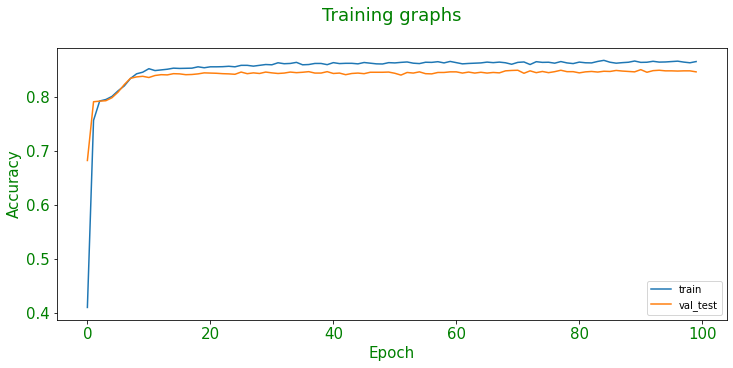

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(fitted_model.history["accuracy"])
plt.plot(fitted_model.history["val_accuracy"])
plt.xlabel("Epoch",color='green',size=15)
plt.xticks(color='green',size=15)
plt.ylabel("Accuracy",color='green',size=15)
plt.yticks(color='green',size=15)
plt.title("Training graphs\n",color='green',size=18)
plt.legend(['train','val_test'])

In [ ]:
ypred=ann.predict(xtest)
ypred=(ypred>0.5)
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, ypred))

0.8618181818181818


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, ypred))

[[2534  123]
 [ 333  310]]
